# Notebook for making 3Di consensus sequence comparisons between ProstT5 and foldseek


In [78]:
from Bio import SeqIO
import pandas as pd
from plotnine import ggplot, geom_histogram, aes, theme_bw, labs
from typing import List

def hamming_distance(seq1: str, seq2: str) -> int:
    """
    Funciton to compute hamming distance between two DNA strings.
    """
    assert len(seq1) == len(seq1)
    
    # naive approach: count differences
    return len([i for i in range(len(seq1)) if seq1[i] != seq2[i]])

def substitution_distance(seq1: str, seq2: str, sub_mat: pd.DataFrame):
    """
    Function to calculate distance based on substitution matrix.
    """

    assert len(seq1) == len(seq2)

    return sum([sub_mat.loc[aa1][aa2] for aa1, aa2 in zip(seq1, seq2)])

def sequence_identity(seq1: str, seq2: str, method='hamming') -> float:
    """
    Function to calculate sequence identiy.
    """
    assert len(seq1) == len(seq2)

    match method:
        case 'hamming':
            return ( len(seq1) - hamming_distance(seq1, seq2) ) / len(seq1)


In [2]:
import os
os.chdir('..')
os.getcwdb()

b'/home/mpjw/study/bioinformatics/semesters/2024s/steineggerLab-SNU/consensus3Di'

## Start sequences

In [26]:
fsk_base_fa = "out/scope/scope.foldseek.3Di.fasta"
pt5_base_fa = "out/scope/scope.prostt5.3Di.fasta"
fsk_base_file = SeqIO.parse(fsk_base_fa,  "fasta")
pt5_base_file = SeqIO.parse(pt5_base_fa, "fasta") 

fsk_base_recs = {e.id.replace('.pdb', ''): e for e in fsk_base_file}
# pt5_base_recs = {e.id.replace('.pdb', ''): e for e in pt5_base_file}

base_seq_id = {e.id.replace('.pdb', ''): sequence_identity(e.seq, fsk_base_recs[e.id.replace('.pdb', '')].seq) for e in pt5_base_file}

df_start_seq_id = pd.DataFrame(base_seq_id.items(), columns = ['pdb_id', 'seq_identity'])

df_start_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_start_seq_id, aes(x='seq_identity')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "Initial 3Di foldseek to ProstT5 sequence identity", x = "Sequence identity", y = "Count")
)
plot.save('out/scope_start_3Di_sequence_identity_hist.png', format='png', height=10, width=15)

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/scope_start_3Di_sequence_identity_hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 25'. Pick better value with 'binwidth'.


## ProstT5 encoder only consensus sequences
This section compares the results for predicting consensus 3Di sequences from initial foldseek 3Dis and 3Dis obtained from ProstT5's encoder only on the test data fasta file.


In [27]:
fsk_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
pt5_fa = "out/scope/prostt5/prostt53Di.encoderOnlyAA.encoderOnly3Di.fasta"
fsk_file = SeqIO.parse(fsk_fa,  "fasta")
pt5_file = SeqIO.parse(pt5_fa, "fasta") 

fold_entries = {e.id.replace('.pdb', ''): e for e in fsk_file}

seq_id = {e.id.replace('.pdb', ''): sequence_identity(e.seq, fold_entries[e.id.replace('.pdb', '')].seq) for e in pt5_file}

df_seq_id = pd.DataFrame(seq_id.items(), columns = ['pdb_id', 'seq_identity'])

df_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_seq_id, aes(x='seq_identity')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "3Di sequence identity of ProstT5 inferrence (foldseek vs ProstT5 start)", x = "Sequence identity", y = "Count")
)
plot.save('out/scope_3Di_sequence_identity_hist.png', format='png', height=10, width=15)

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/scope_3Di_sequence_identity_hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


## ProstT5 consensus based on foldseek versus foldseek consensus

In [25]:
fsk_cons_fa = "out/foldseek/foldseek.3Di.consensus.fasta"
pt5_cons_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
fsk_cons_file = SeqIO.parse(fsk_cons_fa,  "fasta")
pt5_cons_file = SeqIO.parse(pt5_cons_fa, "fasta") 

fsk_cons_recs = {e.id.replace('.pdb', ''): e for e in fsk_cons_file}
pt5_cons_recs = {e.id.replace('_pdb', ''): e for e in pt5_cons_file}

seq_id = {e.id: sequence_identity(e.seq, fsk_cons_recs[i].seq) for i, e in pt5_cons_recs.items()}

df_seq_id = pd.DataFrame(seq_id.items(), columns = ['pdb_id', 'seq_identity'])

df_seq_id[['seq_identity']].describe()

plot = (
    ggplot(df_seq_id, aes(x='seq_identity')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "3Di sequence identity of ProstT5 on foldseek initial vs foldseek consensus", x = "Sequence identity", y = "Count")
)
plot.save('out/foldseek_consensus.foldseek_prostt5.3Di.seq_identity.hist.png', format='png', height=10, width=15)

/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 10 in image.
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: out/foldseek_consensus.foldseek_prostt5.3Di.seq_identity.hist.png
/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


## Substitution matrix comparison

In [76]:
# loading substitution matrix
sub_mat = "data/mat3di.tsv"
df_sub_mat = pd.read_csv(sub_mat,skiprows=3,index_col=0,delimiter="\t")
print(df_sub_mat)
df_sub_mat.loc['A']['D']

    A   C  D   E  F  G  H   I   K   L  ...   N  P   Q  R   S   T   V   W   Y  \
A   6  -3  1   2  3 -2 -2  -7  -3  -3  ...  -5 -1   1 -4  -7  -5  -6   0  -2   
C  -3   6 -2  -8 -5 -4 -4 -12 -13   1  ...   0  0   1 -1   0  -8   1  -7  -9   
D   1  -2  4  -3  0  1  1  -3  -5  -4  ...  -2  1  -1 -1  -4  -2  -3  -2  -2   
E   2  -8 -3   9 -2 -7 -4 -12 -10  -7  ...  -8 -6  -3 -8 -10 -10 -13  -6  -3   
F   3  -5  0  -2  7 -3 -3  -5   1  -3  ...  -5 -2   2 -5  -8  -3  -7   4  -4   
G  -2  -4  1  -7 -3  6  3   0  -7  -7  ...  -2 -2  -4  3  -3   4  -6  -4  -2   
H  -2  -4  1  -4 -3  3  6  -4  -7  -6  ...   0 -1  -3  1  -3  -1  -5  -5   3   
I  -7 -12 -3 -12 -5  0 -4   8  -5 -11  ...  -7 -6  -6 -3  -9   6 -12  -5  -8   
K  -3 -13 -5 -10  1 -7 -7  -5   9 -11  ... -12 -6  -5 -9 -14  -5 -15   5  -8   
L  -3   1 -4  -7 -3 -7 -6 -11 -11   6  ...  -3 -2   2 -4  -4  -9   0  -8  -9   
M -10 -14 -5 -17 -9 -1 -6   7  -8 -16  ...  -9 -9 -10 -5 -10   3 -16  -6  -9   
N  -5   0 -2  -8 -5 -2  0  -7 -12  -3  .

1

        subst_dist
count   498.000000
mean    383.923695
std     357.296593
min    -610.000000
25%     137.000000
50%     353.000000
75%     576.000000
max    1814.000000


/home/mpjw/miniconda3/envs/prostt5/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 22'. Pick better value with 'binwidth'.


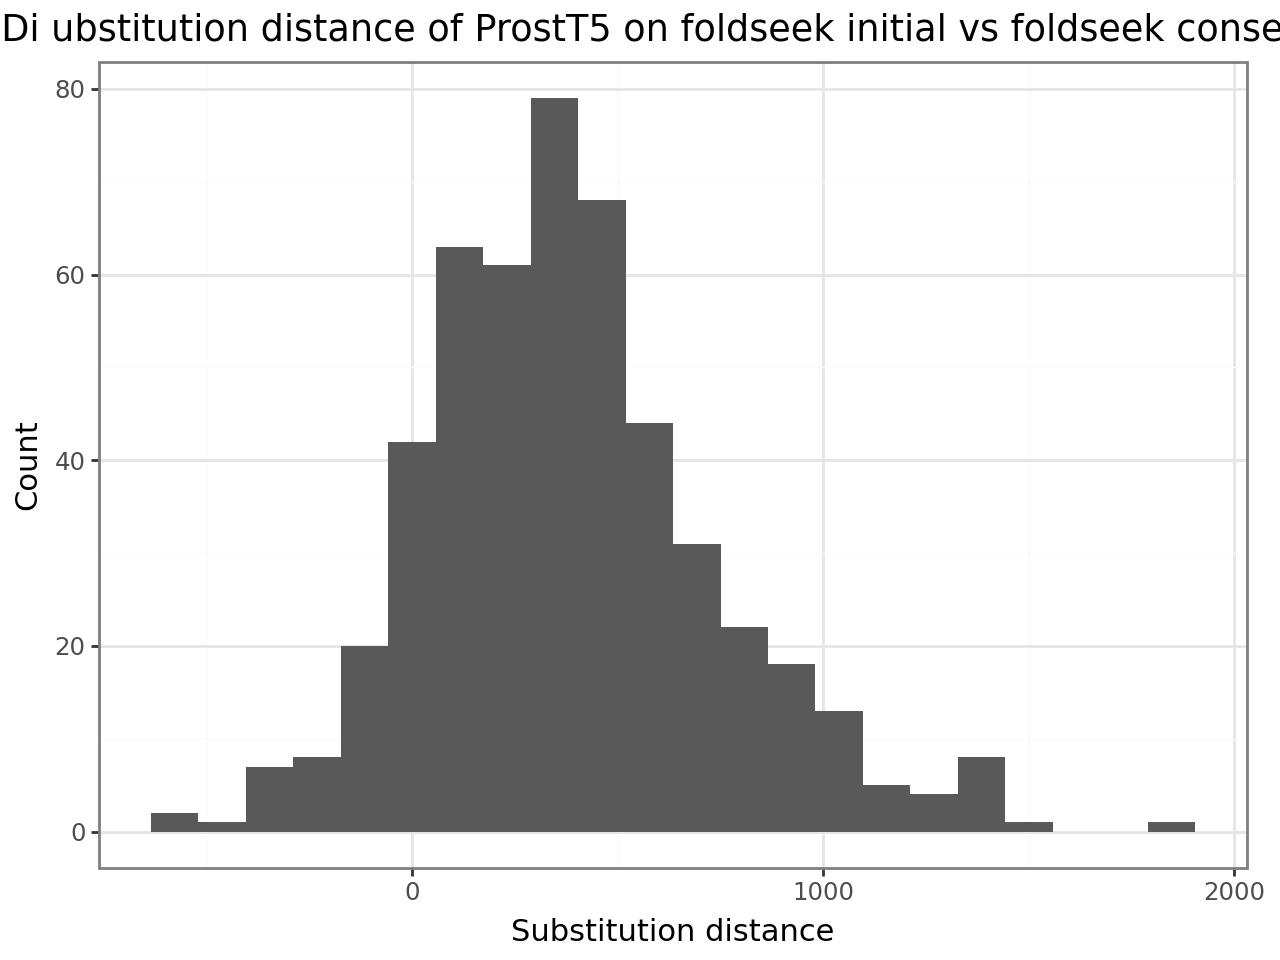

In [81]:
# calculate substitution distance for all consensus foldseek versus prostt5 3Di sequences
fsk_cons_fa = "out/foldseek/foldseek.3Di.consensus.fasta"
pt5_cons_fa = "out/scope/foldseek/foldseek3Di.encoderOnlyAA.encoderOnly3Di.fasta"
fsk_cons_file = SeqIO.parse(fsk_cons_fa,  "fasta")
pt5_cons_file = SeqIO.parse(pt5_cons_fa, "fasta") 

fsk_cons_recs = {e.id.replace('.pdb', ''): e for e in fsk_cons_file}
pt5_cons_recs = {e.id.replace('_pdb', ''): e for e in pt5_cons_file}

seq_id = {e.id: substitution_distance(e.seq, fsk_cons_recs[i].seq, df_sub_mat) for i, e in pt5_cons_recs.items()}

df_seq_id = pd.DataFrame(seq_id.items(), columns = ['pdb_id', 'subst_dist'])

print(df_seq_id[['subst_dist']].describe())

plot = (
    ggplot(df_seq_id, aes(x='subst_dist')) + 
        geom_histogram() + 
        theme_bw() + 
        labs(title = "3Di ubstitution distance of ProstT5 on foldseek initial vs foldseek consensus", x = "Substitution distance", y = "Count")
)

plot.show()


In [6]:
prost_file = SeqIO.parse(prostt5_fasta, "fasta")
post_entries = {e.id: e for e in prost_file}

In [19]:
start_seq_id.keys()

dict_keys(['d1y5ia2.pdb', 'd1p80a2.pdb', 'd1hk8a_.pdb', 'd3c98a_.pdb', 'd1ehka_.pdb', 'd3ss1a_.pdb', 'd3bvua2.pdb', 'd1y5ib_.pdb', 'd1uqwa_.pdb', 'd3qoma_.pdb', 'd1wcga1.pdb', 'd2p3ya1.pdb', 'd1x9da1.pdb', 'd1shyb1.pdb', 'd2bw3a2.pdb', 'd3bzna_.pdb', 'd2qvja_.pdb', 'd1k0ga_.pdb', 'd3fvsa_.pdb', 'd2h12a_.pdb', 'd2qeea_.pdb', 'd3bona1.pdb', 'd2hhva2.pdb', 'd2byla1.pdb', 'd1hx0a2.pdb', 'd2rfva_.pdb', 'd1hn0a1.pdb', 'd1lfka_.pdb', 'd1kfwa1.pdb', 'd1xksa_.pdb', 'd1edqa2.pdb', 'd1kiya_.pdb', 'd1koba_.pdb', 'd2sqca1.pdb', 'd2xrwa_.pdb', 'd1iuga_.pdb', 'd1n4qb_.pdb', 'd1e1oa2.pdb', 'd1svva_.pdb', 'd2rfba_.pdb', 'd1szwa_.pdb', 'd1ri6a_.pdb', 'd1hjua_.pdb', 'd1tb3a1.pdb', 'd1rhca_.pdb', 'd1gkra2.pdb', 'd1zyla1.pdb', 'd2afwa_.pdb', 'd2f8la1.pdb', 'd3bzka3.pdb', 'd1c8ba_.pdb', 'd1l7aa_.pdb', 'd1n00a_.pdb', 'd3ljsa_.pdb', 'd1dmha_.pdb', 'd1q8fa_.pdb', 'd2bbva_.pdb', 'd3iq0a_.pdb', 'd1u3da1.pdb', 'd1z3ix2.pdb', 'd2a0ma1.pdb', 'd3aala_.pdb', 'd1d7oa_.pdb', 'd3o26a_.pdb', 'd3poza_.pdb', 'd1k32a4.pdb',

In [20]:
fold_pdb_ids = [k.replace('.pdb', '') for k in fold_entries.keys()]
post_pdb_ids = [k.replace('_pdb', '') for k in post_entries.keys()]
fold_start_ids = [k.replace('.pdb', '') for k in start_seq_id.keys()]

print(fold_pdb_ids)
print(fold_start_ids)

['d1a17a_', 'd1a1xa_', 'd1a4ia2', 'd1a6bb_', 'd1a8ya2', 'd1alla_', 'd1auoa_', 'd1b24a2', 'd1b79a_', 'd1b8wa_', 'd1b9ma1', 'd1bnba_', 'd1bo9a_', 'd1boua_', 'd1c0ma1', 'd1c8ba_', 'd1ca1a1', 'd1cg2a2', 'd1cjxa2', 'd1cnva_', 'd1coja1', 'd1cvja2', 'd1d7oa_', 'd1dgwa_', 'd1dmha_', 'd1dv1a3', 'd1dx5i1', 'd1e1oa2', 'd1e3ha4', 'd1e43a1', 'd1e7ua2', 'd1ed7a_', 'd1edha2', 'd1edqa2', 'd1eeja2', 'd1efub2', 'd1ehka_', 'd1ei9a_', 'd1el0a_', 'd1eo0a_', 'd1eova1', 'd1epwa1', 'd1eqfa1', 'd1es6a2', 'd1ewsa_', 'd1exta2', 'd1ez4a2', 'd1f1ua1', 'd1f2ri_', 'd1f3va_', 'd1f45b_', 'd1f7la_', 'd1fcda3', 'd1fj2a_', 'd1fs1b1', 'd1g8qa_', 'd1gkra2', 'd1gksa_', 'd1gkza2', 'd1gl4a2', 'd1gm5a1', 'd1gmea_', 'd1gph12', 'd1grja2', 'd1h72c2', 'd1h99a1', 'd1hcnb_', 'd1hfel2', 'd1hfua2', 'd1hjua_', 'd1hk8a_', 'd1hlqa_', 'd1hn0a1', 'd1hp1a1', 'd1huxa_', 'd1hx0a2', 'd1i3za_', 'd1i4na_', 'd1i5na_', 'd1in0a2', 'd1iuga_', 'd1iuka_', 'd1ixla_', 'd1j56a_', 'd1j5pa3', 'd1j5pa4', 'd1j9ia_', 'd1ja1a3', 'd1jb0i_', 'd1jb0m_', 'd1jf8a_'

In [23]:
pdb_intersect = set(fold_pdb_ids).intersection(set(fold_start_ids))
print(len(fold_start_ids))
print(len(pdb_intersect))
print(pdb_intersect)

498
498
{'d1zc6a1', 'd2if5a_', 'd2c1ia1', 'd1g8qa_', 'd1f45b_', 'd2gqfa1', 'd2giya1', 'd1prtb1', 'd1f2ri_', 'd1vlya1', 'd3dl3a1', 'd1xoda1', 'd2c2la1', 'd1szba2', 'd3c9ga_', 'd1a4ia2', 'd1r2za2', 'd1rwta_', 'd1xnea_', 'd3qoma_', 'd1n7ea_', 'd1jjta_', 'd1lbva_', 'd1rj8a_', 'd1c8ba_', 'd2ccja_', 'd2a8ya_', 'd1szwa_', 'd1wiha_', 'd1b9ma1', 'd3bzka1', 'd2sqca1', 'd1ohea1', 'd2nrha1', 'd1sh8a_', 'd2pbea2', 'd3ipra_', 'd1tb3a1', 'd1ulia1', 'd1bnba_', 'd1d7oa_', 'd1rzfl2', 'd1wfoa1', 'd2wcja_', 'd3ktoa_', 'd3dnpa_', 'd2x55a_', 'd1sfna_', 'd1m3sa_', 'd1ppja2', 'd1q90a3', 'd1r3da_', 'd1z3ix2', 'd1sxje1', 'd2gena1', 'd1o9aa1', 'd2b0aa1', 'd2gysa4', 'd1r44a_', 'd1k18a_', 'd1jf8a_', 'd1z0pa1', 'd1szpa1', 'd1cg2a2', 'd3gdla_', 'd1wifa_', 'd1lbua2', 'd1whya_', 'd1yo6a1', 'd2nrha2', 'd1in0a2', 'd1s98a_', 'd2hqya2', 'd1ewsa_', 'd1ka8a_', 'd2a9ua1', 'd1k94a_', 'd1eeja2', 'd1k32a4', 'd2ag4a_', 'd1kzyc1', 'd2xcea_', 'd1a17a_', 'd2a1fa1', 'd1iuka_', 'd1ja1a3', 'd2fyga1', 'd2q78a1', 'd1jvaa3', 'd2egja_', '

## Victors substitution matrix comparison

In [46]:
def read_substitution_matrix(matrix_str):
    # Split the string into lines
    lines = matrix_str.strip().split("\n")
    
    lines = lines[3:]
    
    # Extract the header (amino acids)
    header = lines[0].split()
    
    # Initialize the substitution matrix dictionary
    subMat = {}
    
    # Process each line after the header
    for line in lines[1:]:
        parts = line.split()
        row_letter = parts[0]
        scores = parts[1:]
        
        # Ensure the row exists in the dictionary
        subMat[row_letter] = {}
        
        # Populate the row with scores
        for col_letter, score in zip(header, scores):
            subMat[row_letter][col_letter] = int(score)
    
    return subMat


def id_percentage(str1, str2):
    if len(str1) != len(str2):
        str1=str1[:min(len(str1),len(str2))]
        str2=str2[:min(len(str1),len(str2))]
    matches = float(sum(c1 == c2 for c1, c2 in zip(str1, str2)))
    
    identity = float((matches / len(str1))) * 100.0

    return identity

with open('data/mat3di.out') as fh:
    content = fh.read()
    subMat = read_substitution_matrix(content)
    

identity_percentage = id_percentage

id=''
fs_seqs={}
lens=[]
with open(fsk_base_fa, 'r') as fs:
    for line in fs:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            fs_seqs[id]=line.strip()
            lens.append(len(line.strip())) 
           
prostT5_seqs={}
with open(pt5_base_fa, 'r') as pt5:
    for line in pt5:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            prostT5_seqs[id]=line.strip()
            
fs_profile_seqs={}
with open(fsk_cons_fa, 'r') as prof:
    for line in prof:
        if line[0]=='>':
            id=line.strip().replace('.pdb', '')
        else:
            fs_profile_seqs[id]=line.strip()
            
pt5_profile_seqs={}
with open(pt5_cons_fa, 'r') as prof:
    for line in prof:
        if line[0]=='>':
            id=line.strip().replace('_pdb', '')
        else:
            pt5_profile_seqs[id]=line.strip()
fs_percentage=[]
pt5_percentage=[]

sum_seq=0

for id in fs_seqs:
    fs_percentage.append(id_percentage(fs_seqs[id], fs_profile_seqs[id]))
    pt5_percentage.append(id_percentage(prostT5_seqs[id], pt5_profile_seqs[id]))

size = 500   
fs_percentage_sorted=sorted(fs_percentage)
pt5_percentage_sorted=sorted(pt5_percentage)
percentages=[0.1*i for i in range(size)]
cnt1=0
cnt2=0
fs=[]
pt5=[]

for i in range(size):
    while(fs_percentage_sorted[cnt1]<percentages[i]):
        cnt1+=1
    while(pt5_percentage_sorted[cnt2]<percentages[i]):
        cnt2+=1
    fs.append(1-(cnt1/len(fs_percentage_sorted)))
    pt5.append(1-(cnt2/len(pt5_percentage_sorted)))

In [35]:
print(len(fs_percentage_sorted))
print(len(pt5_percentage_sorted))
print(cnt1)
print(cnt2)
print(len(percentages))

498
498
1
84
500


In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 10})
sns.set_style('whitegrid')
fig, axs=plt.subplots(1,3,figsize=(22.5,5))
pt5_better_pt5=[]
pt5_better_fs=[]
fs_better_pt5=[]
fs_better_fs=[]
for i in range(len(fs_percentage)):
    if fs_percentage[i] > pt5_percentage[i]:
        fs_better_pt5.append(pt5_percentage[i])
        fs_better_fs.append(fs_percentage[i])
    elif fs_percentage[i] < pt5_percentage[i] :
        pt5_better_pt5.append(pt5_percentage[i])
        pt5_better_fs.append(fs_percentage[i])
axs[0].scatter(pt5_better_pt5, pt5_better_fs, color='red', marker='x')
axs[0].scatter(fs_better_pt5, fs_better_fs, color='black', marker='x')
axs[0].plot([50,100], [50,100], color='black')
axs[0].set_xlim(left=50)
axs[0].set_ylim(bottom=50)
axs[0].set_title('Indentity % between 3Di sequence and profile')
axs[0].set_xlabel('ProstT5 identity %')
axs[0].set_ylabel('PDB identity %')

axs[1].hist(fs_percentage, bins=30, label='PDB', alpha=0.5, density=True, color='black')
axs[1].hist(pt5_percentage, bins=30, label='ProstT5', alpha=0.5, density=True, color='red')
axs[1].set_title('Density of sequence identity between 3Di sequence and profile')
axs[1].set_ylabel('Density')
axs[1].set_xlabel('Identity %')
#axs[1].legend()

axs[2].plot(fs, percentages, label='PDB', color='black')
axs[2].plot(pt5, percentages, label='ProstT5', color='red')
axs[2].legend()
axs[2].set_ylabel('Identity %')
axs[2].set_xlabel('Sequence coverage')
axs[2].set_title('Percentage of 3Di sequences over identity treshold')

plt.subplots_adjust(wspace=0.3)

fig.savefig("Identity_percentage_visualization.svg", bbox_inches='tight', dpi=500, pad_inches=0.3)